# Loading the Preprocessed Data

In [3]:
import os
import numpy as np

# Load the arrays
X_train = np.load('../Dataset/Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../Dataset/Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../Dataset/Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../Dataset/Train Test Dataset - Feature 5/y_test.npy')

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Deep Learning Architecture - ANN</h2>
    
</div>


# Importing Libraries - Architecture

In [76]:
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

# 1. Network Initialization

In [77]:
input_dim = X_train.shape[1]  

batch_size = 1024 
epochs = 500  
learning_rate = 0.0001  
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# 2. Define Architecture

In [78]:
ann_model = Sequential([
    
    Dense(2048, input_dim=input_dim, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
    
])

In [79]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              12288     
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 6

# 3. Model Compilation

In [80]:
ann_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping Callback

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Model Checkpoints Callback

In [ ]:
import os
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_path = '/Model Checkpoints/ANN_Model_Checkpoint.h5'

### Check if the checkpoint file exists

In [ ]:
if os.path.exists(checkpoint_path):
    print("Loading model from checkpoint...")
    model = load_model(checkpoint_path)
else:
    print("Checkpoint not found. Initializing new model...")

### Create the checkpoint callback

In [ ]:
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min'
)

# 4. Fit Network

In [82]:
start_time = time.time()

history = ann_model.fit(X_train, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.1,
                         callbacks=[checkpoint, early_stopping],  
                         verbose=1)

end_time = time.time()

training_time = end_time - start_time
print("Training Time: ", training_time, "seconds")

Epoch 1/500


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


546/546 [==============================] - 5s 6ms/step - loss: 0.6459 - accuracy: 0.6196 - val_loss: 0.6318 - val_accuracy: 0.6349
Epoch 2/500
546/546 [==============================] - 3s 5ms/step - loss: 0.6238 - accuracy: 0.6424 - val_loss: 0.6197 - val_accuracy: 0.6457
Epoch 3/500
546/546 [==============================] - 3s 5ms/step - loss: 0.6137 - accuracy: 0.6504 - val_loss: 0.6140 - val_accuracy: 0.6492
Epoch 4/500
546/546 [==============================] - 3s 5ms/step - loss: 0.6049 - accuracy: 0.6579 - val_loss: 0.6014 - val_accuracy: 0.6604
Epoch 5/500
546/546 [==============================] - 3s 5ms/step - loss: 0.5971 - accuracy: 0.6636 - val_loss: 0.5947 - val_accuracy: 0.6665
Epoch 6/500
546/546 [==============================] - 2s 4ms/step - loss: 0.5895 - accuracy: 0.6705 - val_loss: 0.5978 - val_accuracy: 0.6595
Epoch 7/500
546/546 [==============================] - 2s 4ms/step - loss: 0.5817 - accuracy: 0.6766 - val_loss: 0.5884 - val_accuracy: 0.6714
Epoch 8/500

546/546 [==============================] - 3s 5ms/step - loss: 0.3767 - accuracy: 0.8189 - val_loss: 0.4270 - val_accuracy: 0.7888
Epoch 59/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3742 - accuracy: 0.8198 - val_loss: 0.4376 - val_accuracy: 0.7869
Epoch 60/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3730 - accuracy: 0.8209 - val_loss: 0.4239 - val_accuracy: 0.7927
Epoch 61/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3708 - accuracy: 0.8224 - val_loss: 0.4180 - val_accuracy: 0.7962
Epoch 62/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3680 - accuracy: 0.8235 - val_loss: 0.4137 - val_accuracy: 0.7992
Epoch 63/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3659 - accuracy: 0.8250 - val_loss: 0.4133 - val_accuracy: 0.7984
Epoch 64/500
546/546 [==============================] - 3s 5ms/step - loss: 0.3657 - accuracy: 0.8255 - val_loss: 0.4073 - val_accuracy: 0.8024
Epoch

Epoch 115/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2848 - accuracy: 0.8703 - val_loss: 0.3969 - val_accuracy: 0.8143
Epoch 116/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2834 - accuracy: 0.8711 - val_loss: 0.3578 - val_accuracy: 0.8358
Epoch 117/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2826 - accuracy: 0.8715 - val_loss: 0.3715 - val_accuracy: 0.8321
Epoch 118/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2850 - accuracy: 0.8705 - val_loss: 0.3647 - val_accuracy: 0.8347
Epoch 119/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2773 - accuracy: 0.8747 - val_loss: 0.3758 - val_accuracy: 0.8305
Epoch 120/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2773 - accuracy: 0.8743 - val_loss: 0.3666 - val_accuracy: 0.8323
Epoch 121/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2776 - accuracy: 0.8742 - val_loss: 0.3578 - val_ac

546/546 [==============================] - 3s 5ms/step - loss: 0.2294 - accuracy: 0.8992 - val_loss: 0.3498 - val_accuracy: 0.8500
Epoch 172/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2320 - accuracy: 0.8974 - val_loss: 0.3431 - val_accuracy: 0.8541
Epoch 173/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2299 - accuracy: 0.8986 - val_loss: 0.3470 - val_accuracy: 0.8517
Epoch 174/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2261 - accuracy: 0.9005 - val_loss: 0.3436 - val_accuracy: 0.8545
Epoch 175/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2243 - accuracy: 0.9015 - val_loss: 0.3429 - val_accuracy: 0.8559
Epoch 176/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2274 - accuracy: 0.9000 - val_loss: 0.3438 - val_accuracy: 0.8523
Epoch 177/500
546/546 [==============================] - 3s 5ms/step - loss: 0.2250 - accuracy: 0.9012 - val_loss: 0.3489 - val_accuracy: 0.8524

546/546 [==============================] - 3s 5ms/step - loss: 0.1864 - accuracy: 0.9200 - val_loss: 0.3305 - val_accuracy: 0.8679
Epoch 228/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1934 - accuracy: 0.9172 - val_loss: 0.3532 - val_accuracy: 0.8596
Epoch 229/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1867 - accuracy: 0.9202 - val_loss: 0.3328 - val_accuracy: 0.8678
Epoch 230/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1886 - accuracy: 0.9196 - val_loss: 0.3467 - val_accuracy: 0.8617
Epoch 231/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1894 - accuracy: 0.9189 - val_loss: 0.3211 - val_accuracy: 0.8689
Epoch 232/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1872 - accuracy: 0.9202 - val_loss: 0.3354 - val_accuracy: 0.8650
Epoch 233/500
546/546 [==============================] - 3s 5ms/step - loss: 0.1871 - accuracy: 0.9203 - val_loss: 0.3182 - val_accuracy: 0.8708

# Saving the model and training history 

In [ ]:
ann_model.save('ANN_Architecture_5_Features.h5')
np.save('ANN_history_5_Features.npy', history.history)

# 5. Model Evaluation

# Importing Libraries - Evaluation

In [83]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Plotting Loss and Accuracy Curve

### Loss Curve

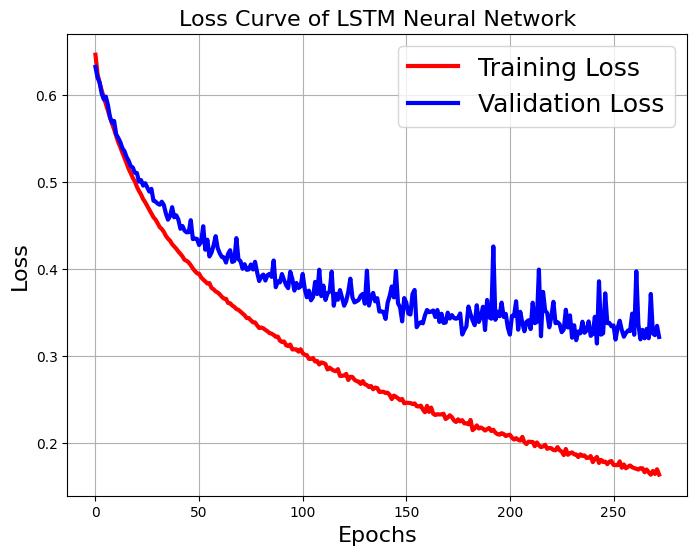

In [84]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.title('Loss Curve of Artificial Neural Network - 5 Features', fontsize=16)

plt.grid(True)
plt.show()

### Accuracy Curve

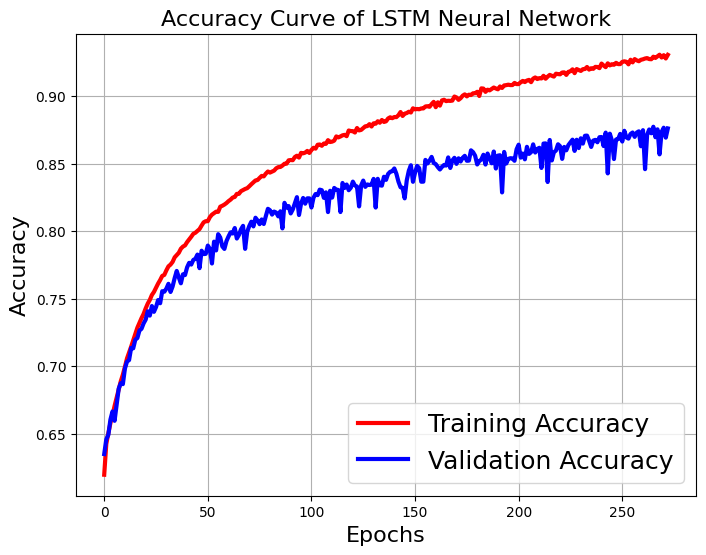

In [85]:
plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.title('Accuracy Curve of Artificial Neural Network - 5 Features', fontsize=16)

plt.grid(True)
plt.show()

###  Make predictions on test data

In [92]:
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).flatten()  # Convert probabilities to classes

4853/4853 [==============================] - 7s 1ms/step


# Classification Report

In [93]:
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

Test accuracy: 0.87, Test loss: 0.32


In [94]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     77676
           1       0.86      0.88      0.87     77614

    accuracy                           0.87    155290
   macro avg       0.87      0.87      0.87    155290
weighted avg       0.87      0.87      0.87    155290



# Confusion Matrix

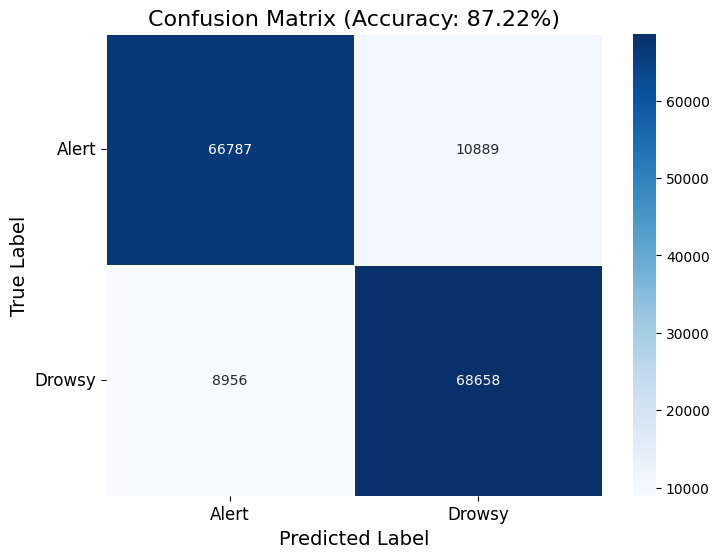

In [95]:
class_labels = ["Alert", "Drowsy"]

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Confusion Matrix ANN - 5 (Accuracy: {accuracy:.2f}%)', fontsize=16)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(rotation=0, fontsize=12)  

plt.show()

# Evaluation Metrics

In [96]:
# Calculate accuracy, precision, recall, F1-score, AUC-ROC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8722068388176959
Precision: 0.8631123738167372
Recall: 0.8846084469296777
F1-score: 0.8737282150151754
AUC-ROC: 0.8722117882210055


# Receiver Operating Characteristic (ROC) Curve

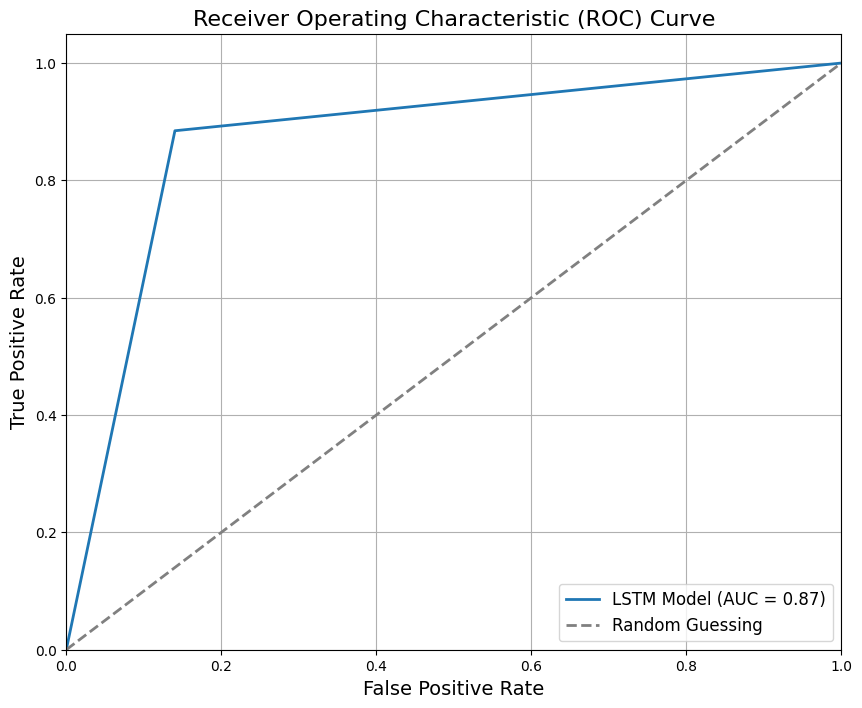

In [97]:
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_data['ANN - 5'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curves 
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()